<a href="https://colab.research.google.com/github/offthetab/ML_homework/blob/main/%D0%9F%D0%A0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# numpy

## Задача №1. Скользящее окно

Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу:

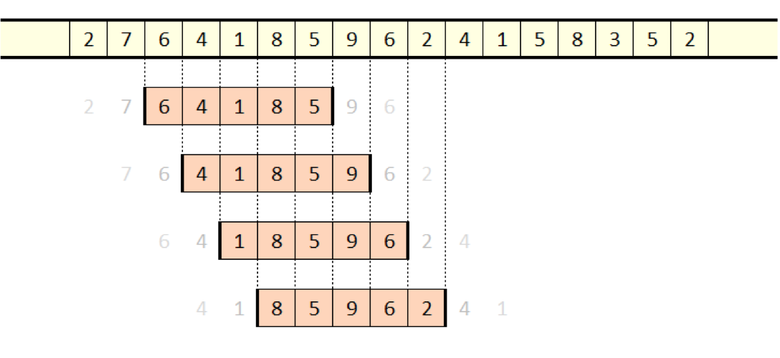

Аргументы функции:

*x_array* - одномерный массив **numpy.ndarray**

*w* - ширина окна для итоговой матрицы

*step* - шаг окна по исходному одномерному ряду данных

Результат:

*A_matrix* - матрица скользящего среднего

In [ ]:
def sliding_window(x_array, w, step = 1):

    A_matrix = list()
    for i in range(len(x_array) - w + 1):
        tmp = x_array[i:i+w]
        A_matrix.append(list(tmp))

    A_matrix = np.matrix(A_matrix[::step])

    return A_matrix

In [ ]:
import numpy as np
# проверка 1
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

# проверка 2
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


# **Анализ данных по доходу населения UCI Adult**


Автор материала: Юрий Кашницкий (@yorko в Slack ODS). Материал распространяется на условиях лицензии Creative Commons CC BY-NC-SA 4.0. Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult)**

Уникальные значения признаков (больше информации по ссылке выше):

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=', ',
                   engine='python', header=None,
                   names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                          "relationship",
                          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

list_of_objects = data.dtypes.axes[0][data.dtypes == "object"]
data[list_of_objects] = data[list_of_objects].astype("string")

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **0. Изучить в документации методы groupby и agg**

## **1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

### Визуализировать результат

21790 10771


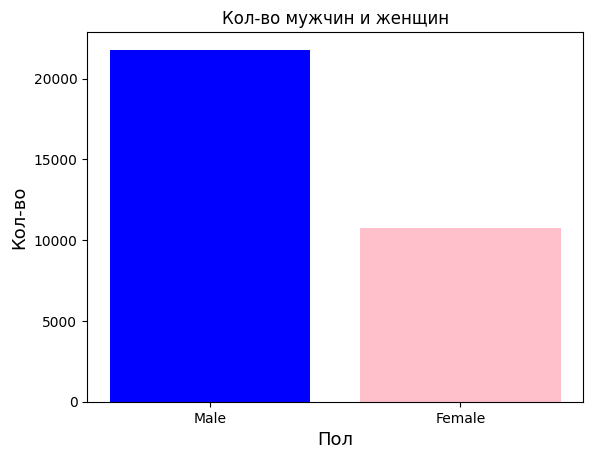

In [ ]:
male_amount = len(data[data['sex'] == 'Male'])
female_amount = len(data[data['sex'] == 'Female'])
print(male_amount, female_amount)

plt.bar(["Male", "Female"],
        [male_amount, female_amount],
        color=['b', 'pink'])

plt.title('Кол-во мужчин и женщин')
plt.xlabel('Пол', fontsize=13)
plt.ylabel('Кол-во', fontsize=13)

plt.show()

## **2. Каков средний возраст (признак age) женщин?**

In [ ]:
mean_age_famales = np.mean((data[data['sex'] == 'Female'])['age'].to_numpy())
print("Средний возраст женщин:", mean_age_famales)

Средний возраст женщин: 36.85823043357163


## **3. Какова доля граждан Германии (признак native-country)?**

In [ ]:
germans = data[data['native-country'] == 'Germany'].shape[0] # кол-во германцев
all = data.shape[0] # Всего записей
print("Доля граждан Германии", float(germans) / float(all) * 100)

Доля граждан Германии 0.42074874850281013


## **4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?**

### Визуализировать результат

              age
salary           
<=50K   36.783738
>50K    44.249841
              age
salary           
<=50K   14.020088
>50K    10.519028


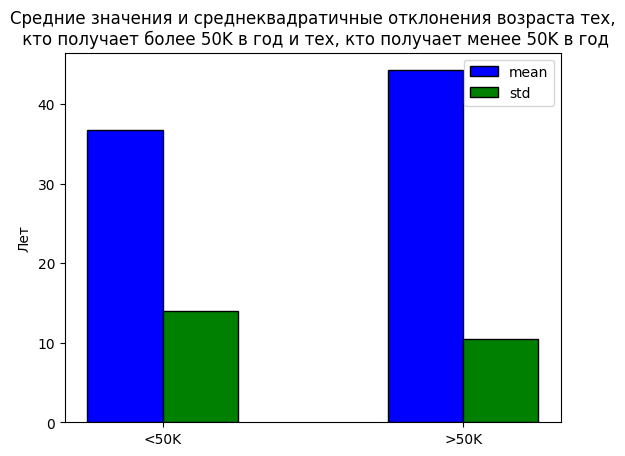

In [ ]:
mean_age_by_salary = data[['age', 'salary']].groupby('salary').mean()
std_age_by_salary = data[['age', 'salary']].groupby('salary').std()
print(mean_age_by_salary)
print(std_age_by_salary)

n = 2
r = np.arange(n)
width = 0.25

plt.bar(r, mean_age_by_salary['age'].to_numpy(), color='b',
        width=width, edgecolor='black',
        label='mean')
plt.bar(r + width, std_age_by_salary['age'].to_numpy(), color='g',
        width=width, edgecolor='black',
        label='std')

plt.ylabel("Лет")
plt.title("Средние значения и среднеквадратичные отклонения возраста тех,\n"
          " кто получает более 50K в год и тех, кто получает менее 50K в год")

plt.xticks(r + width / 2, ['<50K', '>50K'])
plt.legend()

plt.show()

## **6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [ ]:
richies = data[data['salary'] == '>50K']  # Выделяем всех с зарплатой больше 50К
richies_education = richies['education'].unique() # это уже type Series, можем применить метод unique
print(richies_education.to_numpy())

# Ответ: Нет

['HS-grad' 'Masters' 'Bachelors' 'Some-college' 'Assoc-voc' 'Doctorate'
 'Prof-school' 'Assoc-acdm' '7th-8th' '12th' '10th' '11th' '9th' '5th-6th'
 '1st-4th']


## **7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [ ]:
res = data[['race', 'sex', 'age']].groupby(['race', 'sex']).describe()['age'] # группируем по расе и получаем описание групп людей
print(res)
print(res.loc[[('Amer-Indian-Eskimo', 'Male')], ['max']])    # подробнее pandas multindex


                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex

## **8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

### Визуализировать результат

Кол-во женатых: 13541
Кол-во холостых 8249

Кол-во женатых богатых:  5965
Кол-во холостых богатых:  697

Доля зарабатывающих >50K среди женатых:  0.44
Доля зарабатывающих >50K среди одиноких:  0.08


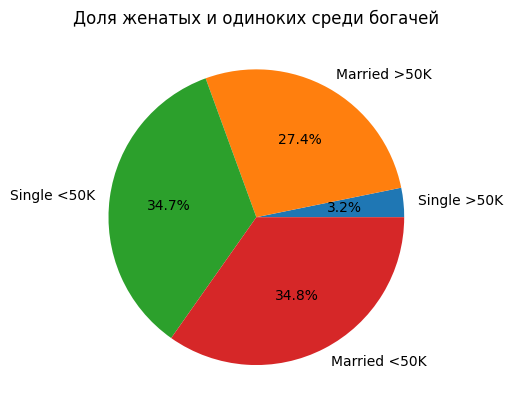

In [ ]:
males = data[data['sex'] == 'Male']  # выбираем мужчин

married = males[males['marital-status'].str.match(pat='Married')]
amount_of_married = len(married)
amount_of_single = len(males) - amount_of_married
print(f'Кол-во женатых: {amount_of_married}\nКол-во холостых {amount_of_single}\n')

richies = males[males['salary'] == '>50K']  # все богачи
richies_married = richies[richies['marital-status'].str.match(pat='Married', case=True)]  # женатые богачи

richies_single = richies[~richies['marital-status'].str.match(pat='Married', case=True)]  # одинокие богачи

amount_of_married_richies = len(richies_married)  # кол-во женатых среди богатых
amount_of_single_richies = len(richies_single)  # Кол-во холостых среди богатых

amount_of_married_poors = amount_of_married - amount_of_married_richies  # кол-во женатых и неженатых с зп <50k
amount_of_single_poors = amount_of_single - amount_of_single_richies

print("Кол-во женатых богатых: ", amount_of_married_richies)
print("Кол-во холостых богатых: ", amount_of_single_richies)

print("\nДоля зарабатывающих >50K среди женатых: ", round(amount_of_married_richies / amount_of_married, 2))
print("Доля зарабатывающих >50K среди одиноких: ", round(amount_of_single_richies / amount_of_single, 2))

amounts: list[int] = [amount_of_single_richies, amount_of_married_richies, amount_of_single_poors,
                      amount_of_married_poors]  # list of amounts

# Визуализация
fig, ax = plt.subplots()
ax.pie(amounts, labels=['Single >50K', 'Married >50K', 'Single <50K', 'Married <50K'], autopct='%1.1f%%')

plt.title("Доля женатых и одиноких среди богачей")
plt.show()

## **9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [ ]:
highest_hours = data['hours-per-week'].max()    # макс кол-во часов в неделю
people_highest_hours = data[data['hours-per-week'] == highest_hours]    # люди, работающие 99 часов в нед
highest_hours_high_income = people_highest_hours[people_highest_hours['salary'] == '>50K']  # работающие 99 часов и с большой ЗП

print(f'Наибольшое кол-во часов в неделю: {highest_hours} часов')
print(f'Кол-во людей, работающих {highest_hours} часов в неделю: {people_highest_hours.shape[0]} человек')
print(f'Процент зарабатывающих много среди работающих 99 часов в неделю {round(highest_hours_high_income.shape[0] / people_highest_hours.shape[0] * 100, 2)}%')

Наибольшое кол-во часов в неделю: 99 часов
Кол-во людей, работающих 99 часов в неделю: 85 человек
Процент зарабатывающих много среди работающих 99 часов в неделю 29.41%


## **10. Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).**

### Визуализировать результат

<Axes: xlabel='Team', ylabel='Total Points'>

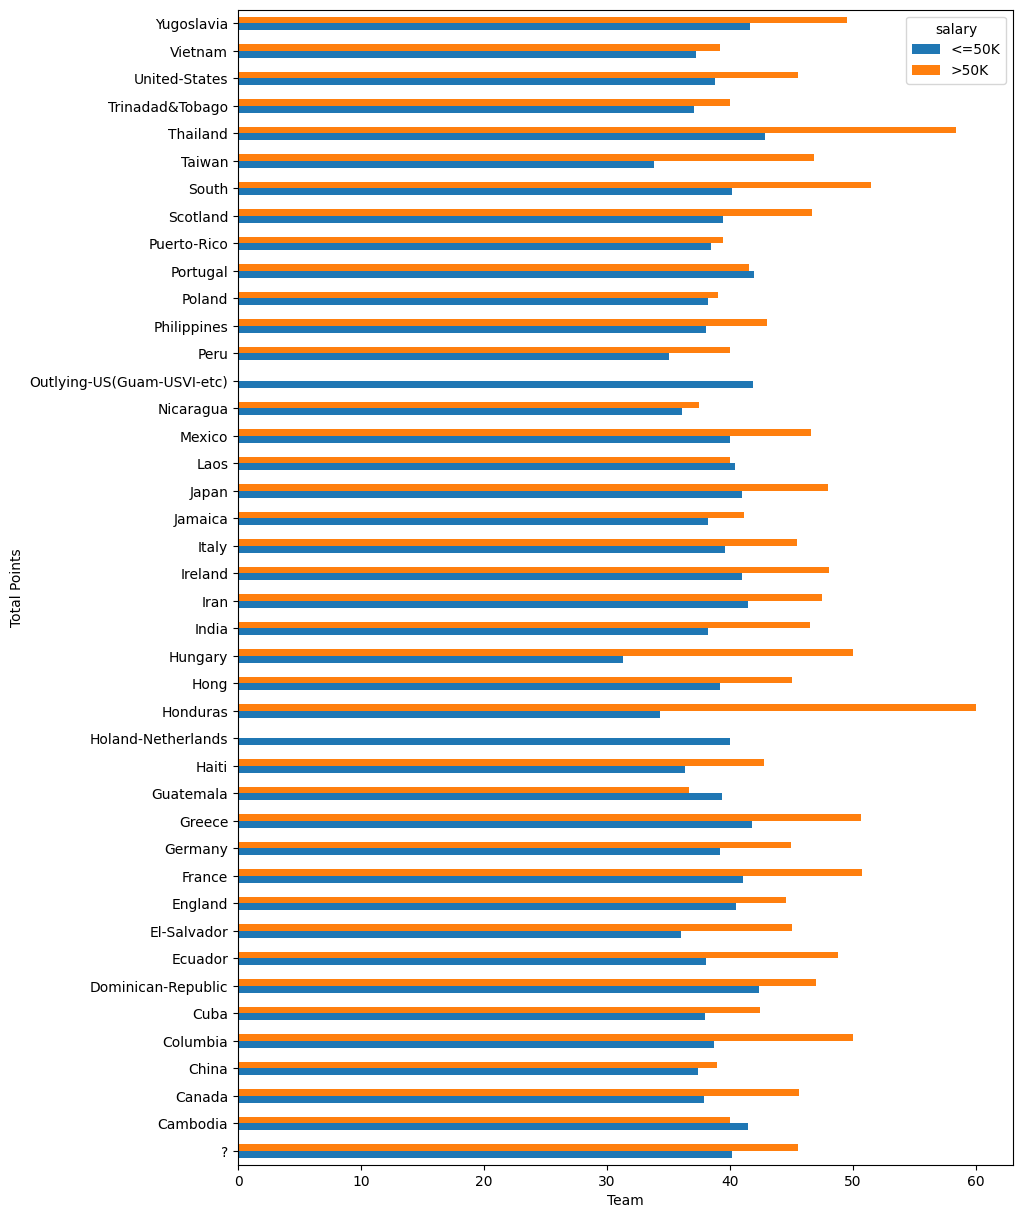

In [ ]:
res = data[['hours-per-week', 'salary', 'native-country']].groupby(['native-country', 'salary']).mean().unstack()


res.plot(kind='barh', y='hours-per-week',
               ylabel='Total Points', xlabel='Team', figsize=(10, 15))